# Support Vector Machines - Explore SVM Visually

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Support Vector Machines - Motivation
Rather than modeling the distribution of each underlaying class, and use generative models to probabilistically determine labels for new points, with SVM, we simply find a line or curve (in 2D) or manifold/hyperplane (in multiple dimesions) that separates the classes from each other.

Consider the simple case of classification task below:

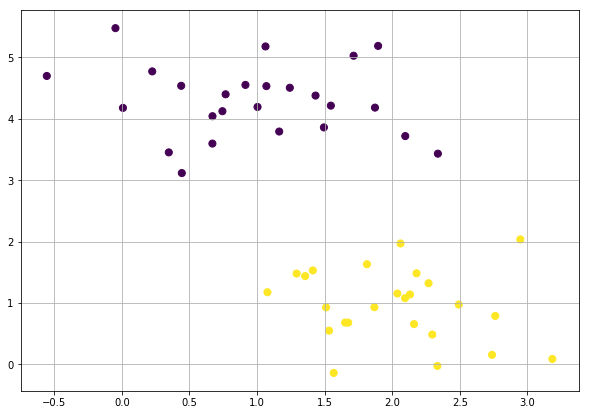

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

# Randomly create 50 samples with 2 centers 
X,y = make_blobs (n_samples = 50, centers = 2, random_state=0, cluster_std= 0.6)

plt.figure (figsize=[10,7])
plt.scatter (X[:, 0], X[:, 1], c=y, s=50) # plot with first and second column of X
plt.grid()

## Linearly separating data
A linear discriminative classifier would simply attemp to draw a straight line to separate the data above.

**Problem:**
Intuitively, there are a vast amount of possible straight lines that can separate data above. *So which one is the best line ?*

The figure below shows that there are multiple ways to draw a straight line. Depending on which straight line we choose, the red dot will be assigned a corresponding new class.

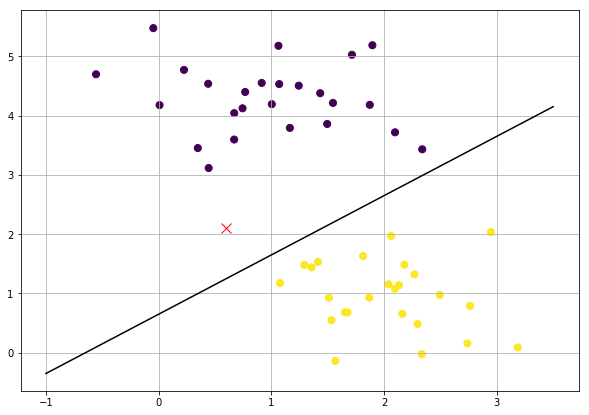

In [ ]:
xfit = np.linspace(start = -1, stop = 3.5, num = 50)

random_point = {"X": 0.6, "y": 2.1}

plt.figure (figsize=[10,7])
plt.scatter (X[:, 0], X[:, 1], c=y, s=50)
plt.plot (random_point["X"], random_point["y"],'x', color = "red", markersize = 10)

for index, (m, b) in enumerate([(0.5, 1.6), (1, 0.65), (-0.2, 2.9)]):
    if index==1:
        yfit = m * xfit + b
        plt.plot(xfit, yfit, '-k') # plot (x,y) with y = m*x+b
plt.grid()

## Support Vector Machines - Maximal Margin Classifier

SVM can tackle the above problem. Intuitively, instead of merely drawing lines to separate data, SVM uses lines together with corresponding *margin* of the width up to the nearest points. 

The figure below illustrate the **_margin_**:

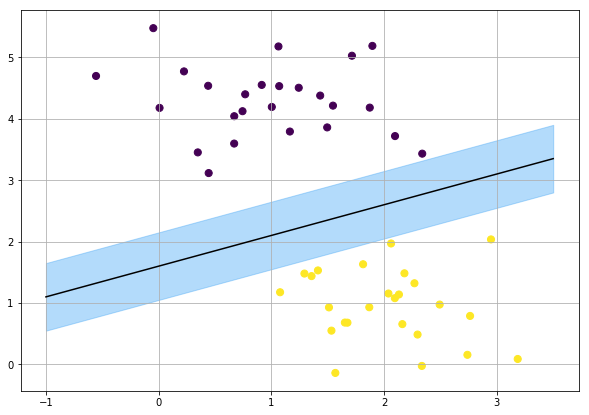

In [ ]:
xfit = np.linspace(start = -1, stop = 3.5, num = 50)

plt.figure (figsize=[10,7])
plt.scatter (X[:, 0], X[:, 1], c=y, s=50)

for index, (m, b, margin) in enumerate([(0.5, 1.6, 0.55), (1, 0.65, 0.33), (-0.2, 2.9, 0.2)]):
    if index==0:
        yfit = m * xfit + b
        plt.plot(xfit, yfit, '-k') # plot (x,y) with y = m*x+b
        plt.fill_between(xfit, yfit - margin, yfit + margin, edgecolor='none',
                         color='#42A5F5', alpha=0.4)
plt.grid()

## How SVM works ?

The middle line seems to be the best choice. By being right in the middle of the two clusters, it is less “risky,” gives the data distributions for each class some wiggle room so to speak, and thus generalizes well on test data.

SVM tries to find such kind of line. Here’s a simplified version of what SVMs do:
- Find lines that correctly classify the training data
- Among all such lines, pick the one that has the greatest distance to the points closest to it.

**To sum up**:
In SVM, the line with the *maximum margin* will be chosen as the decision boundary. SVM is an example of such a *maximum margin classifier*.

## Fitting SVM to the data

In [ ]:
from sklearn.svm import SVC

svc = SVC (kernel = 'linear')
svc.fit (X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    
    # create grid (coordinate system - x and y) to evaluate model
    x = np.linspace(xlim[0], xlim[1], 40)
    y = np.linspace(ylim[0], ylim[1], 40) 
    X, Y = np.meshgrid(x, y)
    flatten_X = X.ravel() 
    flatten_Y = Y.ravel()
    xy = np.vstack([flatten_X, flatten_Y]).T 
    Z = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins.
    ax.contour(X, Y, Z, colors='k', # draw filled contours
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    
    # plot circle around the support vectors returned by fitted SVC model
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1],
                   s=150, linewidth=2, facecolors='none', edgecolors='k');
        

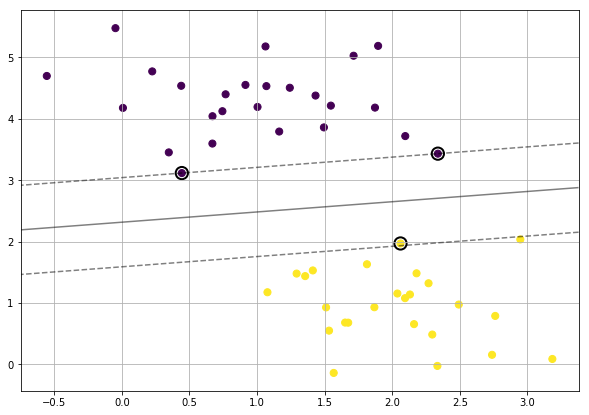

In [ ]:
# Randomly create 50 samples with 2 centers 
# X,y = make_blobs (n_samples = 50, centers = 2, random_state=0, cluster_std= 0.6)

plt.figure (figsize = [10,7])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.grid()
plot_svc_decision_function(svc);

## The Support Vectors

Figure above shows the dividing line that maximizes the margin between the two sets of points. 
Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, deciding the decision boundary and are known as the **support vectors**. 
#### How can they decide the decision boundary?
The sum of the distances of the nearest points to the margin (the support vectors) has to be maximized in order for this line to be the output of the SVM.

#### Why are they called Vectors while they are actually points ?
This is because in a multi-dimensional space when you have more than just two variables/features, then each point is actually no longer a point because you cannot visualize it on a 2-dimensional plane or 3-dimensional space. Therefore, each point is considered as a vector in a multi-dimensional space, which is a more general term.

In Scikit-Learn, the coordinate of these points are stored in the **support\_vectors_** attribute of the classifier:

## The Hyperplane
While the above plot shows a line and data in two dimensions, it must be noted that SVMs work in any number of dimensions; and in these dimensions, they find the analogue of the two-dimensional **_line_**.

For example, in three dimensions they find a **_plane_** , and in higher dimensions they find a **_hyperplane_** — a generalization of the two-dimensional line and three-dimensional plane to an arbitrary number of dimensions.

In [ ]:
svc.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## What makes SVM different from other classifiers ?

A key that makes SVM more robust is that for the fit, only the position of the support vectors matter, that is, these points support the whole algorithm.

Any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

This can be illustrated well with number of samples from 60 to 120 as below:

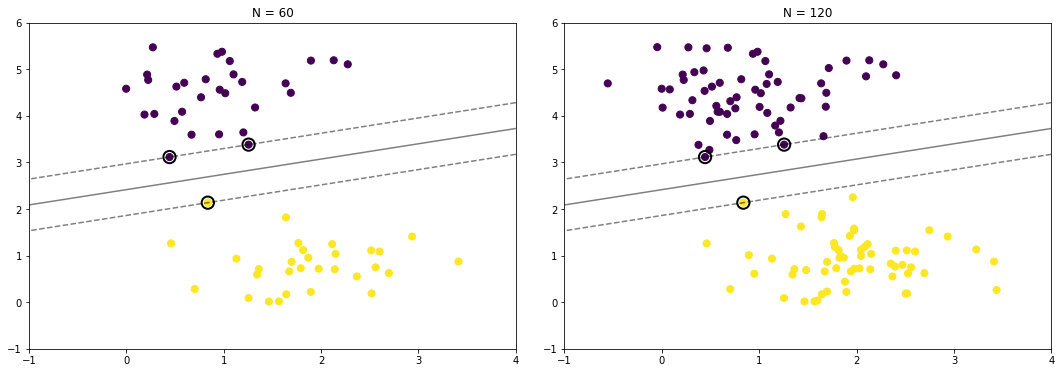

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Observation:

In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(60,120), ax=fixed(None));

interactive(children=(IntSlider(value=60, description='N', max=120, min=60), Output()), _dom_classes=('widget-…

## SVM - Non-linearly Separable Data

In most of real-world problems, the data is not linearly separable as the example above. Surely, finding a hyperplane can’t work anymore. Below is an example:

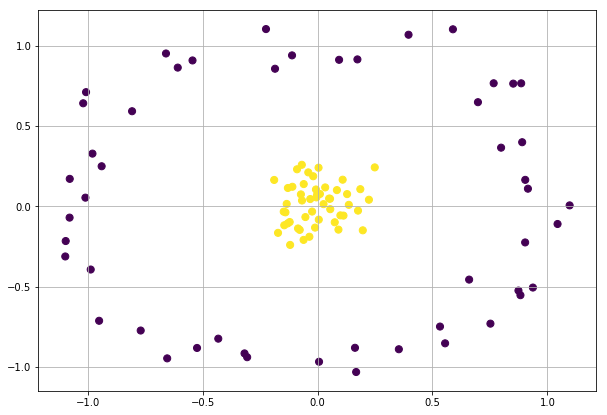

In [ ]:
from sklearn.datasets.samples_generator import make_circles

# Make a large circle containing smaller circle in 2D
X_circle, y_circle = make_circles(100, factor=.1, noise=.1)

svc_circle = SVC(kernel='linear').fit(X_circle, y_circle)

plt.figure (figsize = [10,7])
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, s=50)
plt.grid()
# plot_svc_decision_function(svc_circle, plot_support = False);

## Solution: Project Data into Higher Dimension

The solution is projecting the data into a space where it is linearly separable and find a hyperplane in this space!. For example, one simple projection we could use for the data above would be to compute a **Gaussian Radial Basis Function** centered on the middle clump:


In [ ]:
r = np.exp(-(X_circle ** 2).sum(axis = 1))

We can see from the figure below, with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, r=0.7.

In [ ]:
from mpl_toolkits import mplot3d


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, linewidth=1, edgecolor='k')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev=(0, 90), azim=(0, 90),
         X=fixed(X_circle), y=fixed(y_circle));

interactive(children=(IntSlider(value=30, description='elev', max=90), IntSlider(value=30, description='azim',…

### To sum up:

Wrapping it up, we need to find a function that can project the input features into higher dimension. In this example, this function simply produces a new dimension (a new feature) based on the 2 existing features. This function needs to satisfy the main goal: In the new dimension, the data of 2 classes is linearly separable or nearly linearly separable. 

Here we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results. In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

A potential problem with this strategy—projecting $N$ points into $N$ dimensions—is that it might become very computationally expensive as $N$ grows large. However, with a neat little procedure known as the **_kernel trick_**, a fit on kernel-transformed data can be done implicitly, that is, without ever building the full $N$-dimensional representation of the kernel projection! 
This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.


In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter:

In [ ]:
svc_rbf = SVC(kernel='rbf', C=1E6)
svc_rbf.fit(X_circle, y_circle)

/home/dks/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used

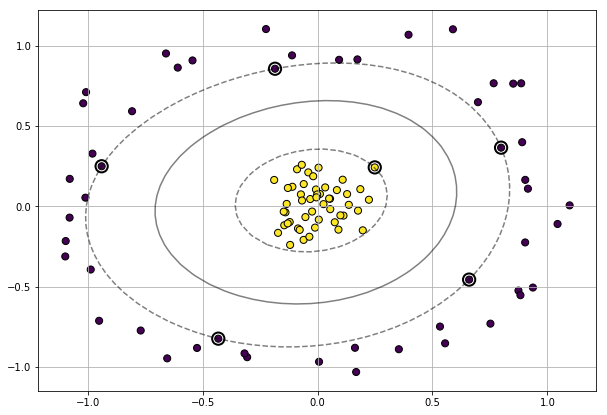

In [ ]:
plt.figure (figsize = [10,7])
plt.grid()
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, s=50, linewidth=1, edgecolor='k')
plot_svc_decision_function(svc_rbf)
# plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
#             s=300, lw=1, facecolors='none');

### Intuitively, in the projected space, this is how it looks like:

Refs: [Stack Overflow](https://stackoverflow.com/questions/41267169/plot-maximum-margin-hyperplane-in-3-space-with-python)

It is noticable that this is just **_visualization_**, not how its kernel actually works. Which means this is not what happens "inside SVM". 

The main target here is plotting a 3D separation hyperplane in the projected space (in this case, via RBF). Therefore, we aim to fit a linear SVC to a set of 3 input features and plot it on the projected space.

In [ ]:
X, y = make_circles (100, factor =.1, noise =.1)
R = np.exp (- (X[:,0] ** 2 + X[:, 1] **2)) # RBF transformation
X_3D = np.insert(X,2,R,axis=1) # Append R as the 3rd column of X to create 3 features

clf = SVC (kernel = 'linear')
clf.fit (X_3D,y)

# Extract coefficients and intercept from SVC model
w = clf.coef_
w1 = w[:,0]
w2 = w[:,1]
w3 = w[:,2]
b = clf.intercept_

With 3 features, the fitted model is able to return 3 corresponding coefficients and an intercept. Also, recall that the function of a plane is:
$$
w_{1}.x + w_{2}.y + w_{3}.z + b = 0
$$

in which, $w_{1}$$, w_{2}, w_{3}$ are the coefficients, $b$ is intercept.

In order to plot the separating plane returned by SVC, the main target is to obtain the $z$ in the above equation, so that we can pass $x, y, z$ to **plot_surface()** function. Therefore:
$$
z = \frac {-w_{1}.x - w_{2}.y - b}{w_{3}}
$$

In [ ]:
xx,yy = np.meshgrid (range (-1,2), range (-1,2)) # Create grid
zz = (-w1 * xx - w2 * yy - b) * 1. /w3 # Calculating z

In [ ]:
def plot_3D_hyperplane(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot (projection = '3d')
    ax.plot_surface (xx,yy,zz,rstride=10, cstride=10, color = '#42A5F5', alpha=0.3)
    ax.scatter3D (X[:,0], X[:,1], X[:,2], c=y, s=50, edgecolor ='k')
    ax.view_init (elev = elev, azim = azim)
    plt.show()

interact(plot_3D_hyperplane, elev=(0, 90), azim=(0, 90),
         X=fixed(X_3D), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90), IntSlider(value=30, description='azim',…

## SVM - Softening Margins - Allowing Some Errors
Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists. But in real life, we are almost unable to perfectly separate the labels? For example, you may have data like this:

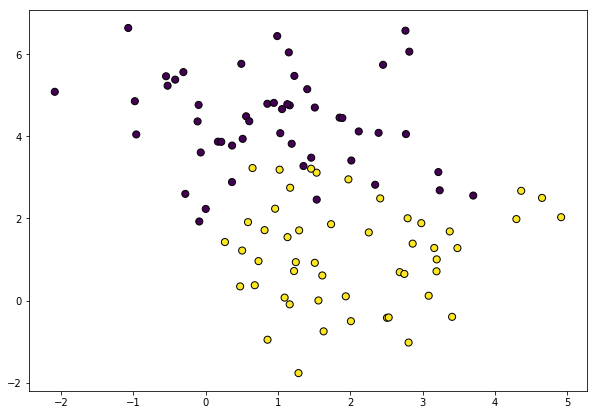

In [ ]:
X_overlap, y_overlap = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.figure (figsize = [10,7])
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_overlap, s=50, linewidth=1, edgecolor='k');

To handle this case, the SVM implementation has a parameter which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows the decision boundary to capture a more general pattern. 

The hardness of the margin is controlled by a tuning parameter, most often known as $C$. 
- For larger $C$, the margin is harder, no points can lie in it and we have less errors on training data.
- For smaller $C$, the margin is softer, and can grow to encompass some points.

The plot shown below gives a visual picture of how a changing $C$ parameter affects the final fit, via the softening of the margin. Notice that the decision boundary actually "tilts" as we change the value of $C$. 

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [1E6, 10.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X_overlap, y_overlap)
    axi.scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_overlap, s=50)
    plot_svc_decision_function(model, axi)
    axi.set_title('C = {0:.2f}'.format(C), size=14)

### What is the best value for C ?

The answer depends on the data we are manipulating. Intuitively, the best C value is the one that help the decision boundary capture the best general trend. Practically, the optimal C can be obtained by tuning with **_cross-validation_**. 

## FAQs

### 1. How did I know what space to project the data onto?
In previous examples, we simply wanted to show how projections to higher dimensions work, so we picked a very specific projection. In general, this is **hard to know**. However, what we do know is data is more likely to be linearly separable when projected onto higher dimensions, thanks to [Cover’s theorem](https://en.wikipedia.org/wiki/Cover%27s_theorem).

In practice, we try out a few high-dimensional projections to see what works. In fact, we can project data onto infinite dimensions and that often works pretty well. 

### 2. So I project the data first and then run the SVM?
No. To make the above example easy to grasp we made it sound like we need to project the data first. The fact is SVM does the projection for you. This has some benefits. For one, SVMs use something kernel tricks to do these projections, and these are pretty fast.

Also, remember the projecting to infinite dimensions in the previous point? If you project the data yourself, how do you represent or store infinite dimensions? It turns out SVMs kernel tricks is a gentlemen here again. 

## Fun Facts - What is special about SVM ?


Given a problem to classify an apple or an orange. 
Traditional machine learning approach: The algorithm will look at the most standard common type apples and the most standard common type of oranges. Which means it would try to learn from the apples that are very like apples so it would know what an apple is.

![](https://i.imgur.com/UCIRoW5.png)

SVM is different: SVM actually looks at the apples that are very much like an orange, and look at the orange that is much like an apple. Which means, they actually the support vectors, the ones that are nearest the boundary.

![](https://i.imgur.com/3RWIYAg.png)

SVM is a very risky type of algorithm because it looks at the very extreme case which is very close to the boundary and it uses that to construct the analysis, hence, very different to most of other machine learning algorithms.


## References

- https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb
- https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93
- https://machinelearningcoban.com/2017/04/22/kernelsmv/